In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import altair as alt 


In [144]:
def new_df(df):
    return df


In [ ]:
#If all the dates are not present, this will fix this. 
#full_date_range = pd.date_range(start=kvaloya_data['date'].min(), 
#                                end=kvaloya_data['date'].max(), freq='D')
#new_kvaloya = new_df(kvaloya_data.set_index('date').reindex(full_date_range).reset_index())


In [146]:
# Load and clean date for analysis
temperature = pd.read_csv('../data/kvaloysletta.csv', sep=';', on_bad_lines='skip'
                          , parse_dates=['Tid(norsk normaltid)'])[:-1]
kvaloya_data = temperature.rename(columns={'Navn': 'name', 'Stasjon':'stasjon', 
                                          'Tid(norsk normaltid)': 'date', 
                                          'Middeltemperatur (døgn)': 'mean_temp',
                                          'Nedbør (døgn)': 'precipitation'})

kvaloya_data = new_df(kvaloya_data).replace({',':'.', '-':'0'}, regex=True)
kvaloya_data = kvaloya_data.astype({'mean_temp': float, 'precipitation': float, 
                                    }).sort_values('date')


/var/folders/58/mh9t9nbj63zg6nbnj_qfkq_w0000gp/T/ipykernel_33360/2592131033.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  temperature = pd.read_csv('../data/kvaloysletta.csv', sep=';', on_bad_lines='skip'


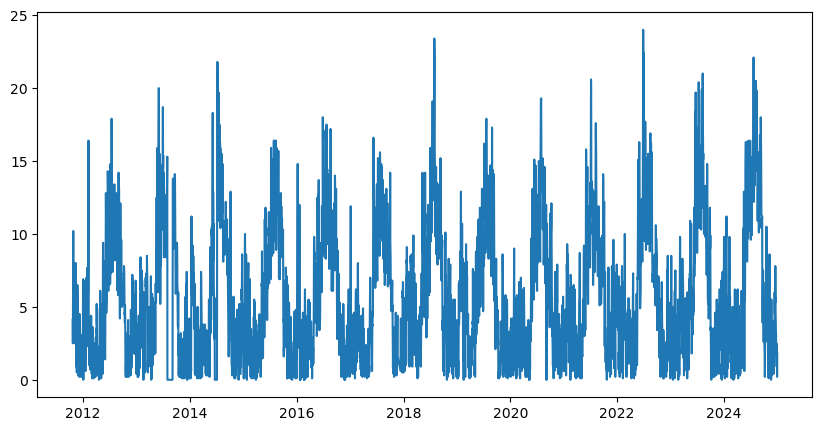

In [147]:
fig, ax = plt.subplots(figsize=(10, 5))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format: YYYY-MM-DD
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.plot(kvaloya_data['date'],kvaloya_data['mean_temp'])
